In [24]:
import pandas as pd
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

#Importing Dataset

In order to solve the target regression problem, a [HousePrice dataset](https://gist.github.com/grantbrown/5853625) is found from

Information about this dataset: This dataset contains 429 items, where each item refers to a house. It has three columns as listed below:

1. HouseAge in year
2. HouseSize in $m^2$
3. HousePrice in $

The input features are `HouseAge` and `HouseSize` and the attribute to be predicted or target attribute/variable is `HousePrice`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/IntroToAI/Week4

/content/drive/MyDrive/IntroToAI/Week4


In [4]:
# Load the dataset by reading the .csv file as a pandas dataframe
data = pd.read_csv('HousingData.csv')
data.columns = ['HouseAge', 'HouseSize', 'HousePrice']  # Replace with actual names
data.head(5)

,HouseAge,HouseSize,HousePrice
0,94.202489,2,74816.49219
1,152.275420,3,82961.80115
2,147.102698,3,93921.31395
3,54.676407,3,92954.43001
4,45.384396,2,78265.11300


#Data Exploration

###Split the data

Define the input features X and the target attribute/variable using two ways

In [5]:
print(data.columns)

Index(['HouseAge', 'HouseSize', 'HousePrice'], dtype='object')


In [6]:
#OPTION 1
# Define the input features X  directly
X = data[['HouseAge', 'HouseSize']]
y = data['HousePrice']


In [7]:
#OPTION 2
# Define the input features X as all columns except 'HousePrice' column and target variable y as the "HousePrice" column
X = data.drop('HousePrice', axis=1)
y = data['HousePrice']

In [8]:
# Using train_test_split function from sklearn to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Set aside futureSample test datasets
# Take two samples from the testset as the future data samples, called futureSample_X, and futureSample_y,
# as the inputs from the real-world cases when the classifier is deployed.

# Get the last two samples from the test  to be the future data samples
futureSample_X = X_test[-2:]
futureSample_y = y_test[-2:]

# Remove the last two samples from the test dataset
X_test = X_test[:-2]
y_test = y_test[:-2]

futureSample_X

,HouseAge,HouseSize
24,32.247183,1
17,73.713336,2


### Explore the training and test datasets

In [10]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

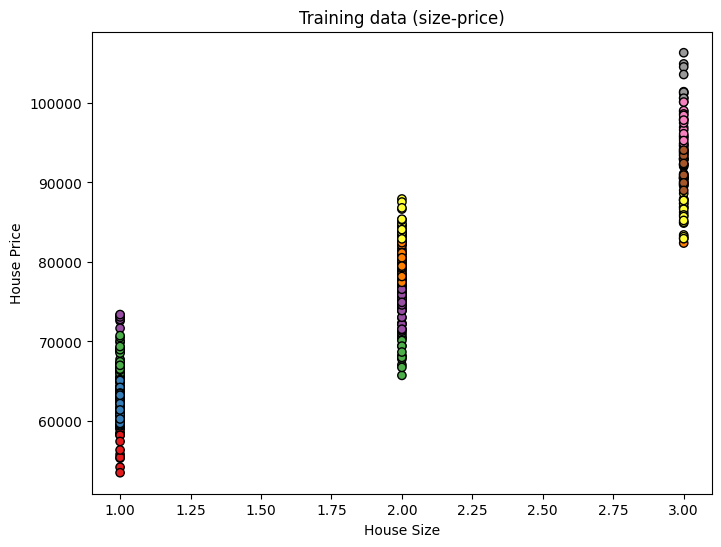

In [11]:
# Using the example of plotting the samples in the training dataset (age-price), plot the samples in the training dataset (size-price)
plt.figure(1, figsize=(8, 6))
plt.scatter(X_train['HouseSize'], y_train, c=y_train, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Training data (size-price)")
plt.show()

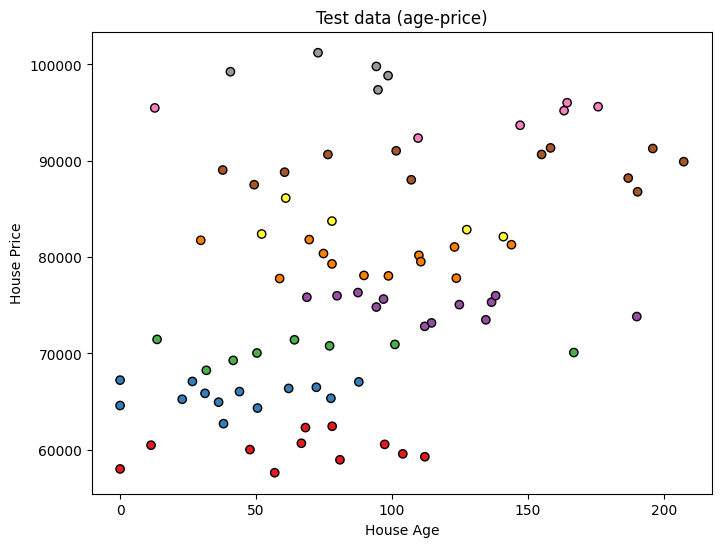

In [12]:
# plot the samples in the test dataset (age-price)
plt.figure(3, figsize=(8, 6))
plt.scatter(X_test['HouseAge'], y_test, c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Age")
plt.ylabel("House Price")
plt.title("Test data (age-price)")
plt.show()

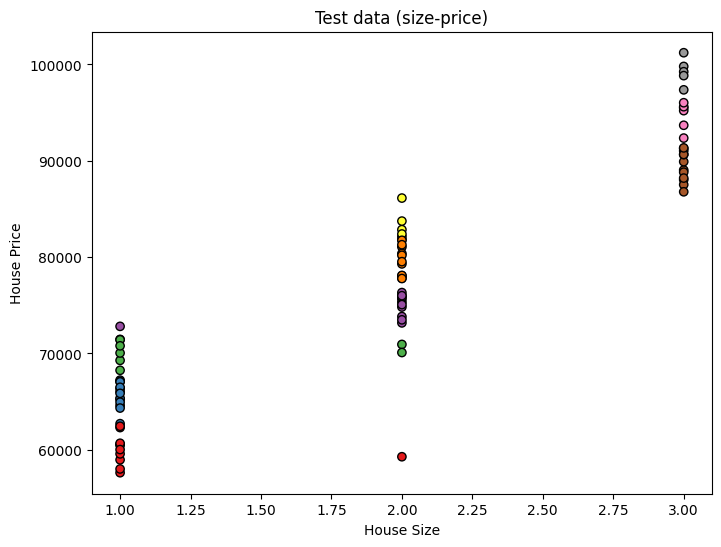

In [13]:
# Use the example of plotting the samples in the test dataset (age-price), plot the samples in the test dataset (size-price)
plt.figure(4, figsize=(8, 6))
plt.scatter(X_test['HouseSize'], y_test, c=y_test, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Test data (size-price)")
plt.show()

# Train a regressor by using a chosen learning algorithm with the trainig dataset.

`model_option`:
* 1- Support vector regression,
* 2- linear regression,
* 3- K nearest neighbours and
* 4- decision tree
* 5- Random forest

In [33]:
model_option = int(input("Choose one model from the following: 1- SVR, 2- LinearRegression, 3- K nearest neighbours, 4-Decision Tree, or 5- RandomForest \n your choice is: "))
if (model_option == 1):
    model = SVR(kernel='rbf',
                degree=3,
                gamma='scale',
                C=1.0,
                epsilon=0.1,
                max_iter=-1)
    model.fit(X_train, y_train)
elif (model_option == 2):
    model = LinearRegression(
        fit_intercept=True,
        copy_X=True)
    model.fit(X_train, y_train)
elif (model_option == 3):
    model = KNeighborsRegressor(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        metric='minkowski'
    )
    model.fit(X_train, y_train)
elif (model_option == 4):
    model = DecisionTreeRegressor(
        criterion="squared_error",
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None,
        random_state=None
    )
    model.fit(X_train, y_train)
elif (model_option == 5):
    model = RandomForestRegressor(
        n_estimators=100,
        criterion="squared_error",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
    )
    model.fit(X_train, y_train)
else: print("invalid option number. Try again")

Choose one model from the following: 1- SVR, 2- LinearRegression, 3- K nearest neighbours, 4-Decision Tree, or 5- RandomForest 
 your choice is: 4


# Evaluate a regression model

In [34]:
# Predicted values of samples in the test dataset
y_pred = model.predict(X_test)

In [35]:
# Calculate the R square of predicted values of samples in the test dataset using the method r1_score() in metrics
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.7226749340526234


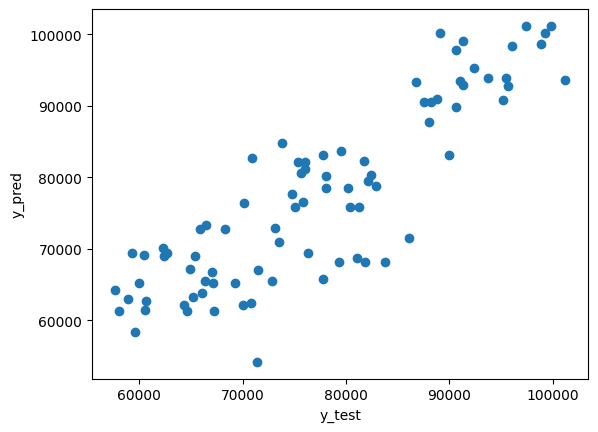

In [36]:
# Present the regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()